In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.decomposition import TruncatedSVD

In [2]:
data = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Recommender system/movies.csv")

In [3]:
data.head()

,User_Id,Item_Id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
data.shape

(100000, 4)

In [6]:
data.isnull().sum()/len(data)*100

User_Id      0.0
Item_Id      0.0
Rating       0.0
Timestamp    0.0
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   User_Id    100000 non-null  int64
 1   Item_Id    100000 non-null  int64
 2   Rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
# most popular movies
popular_movies = pd.DataFrame(data.groupby('Item_Id')['Rating'].count())
most_popular = popular_movies.sort_values('Rating',ascending=False)
most_popular.head(10)

,Rating
Item_Id,
50,583
258,509
100,508
181,507
294,485
286,481
288,478
1,452
300,431


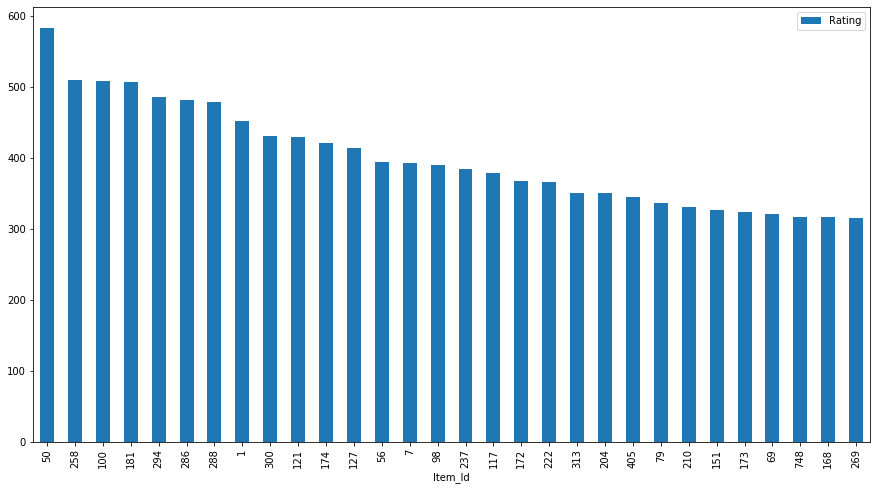

In [11]:
# Plot the 30 most popular movies
most_popular.head(30).plot(kind='bar',figsize=(15,8))

### Recommendation System - Part II

##### Model-based collaborative filtering system
Recommend movies to users based on movies they watched and similarity of movie ratings provided by other users who watched movies similar to that of a particular customer.
A model based collaborative filtering technique is chosen here as it helps in predicting movies for a particular user by identifying patterns based on preferences from multiple user data.

In [12]:
# Utility matrix

movie_lens_ratings = data.head(10000)

In [14]:
ratings_utility_matrix = movie_lens_ratings.pivot_table(values='Rating',index='User_Id',columns='Item_Id',fill_value=0)
ratings_utility_matrix.head()

Item_Id,1,2,3,4,5,6,7,8,9,10,...,1493,1495,1497,1498,1500,1503,1508,1518,1520,1529
User_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ratings_utility_matrix.shape

(385, 1254)

In [16]:
# Transpose the matrix
ratings_utility_matrix = ratings_utility_matrix.T
ratings_utility_matrix.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,378,379,380,381,382,385,386,387,388,389
Item_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,2,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Transpose the matrix
ratings_utility_matrix.shape

(1254, 385)

In [19]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_utility_matrix)
decomposed_matrix

array([[ 7.17678724e+00, -2.76146914e+00,  9.20844167e-01, ...,
         7.95580744e-01, -1.53533083e+00,  4.30863872e+00],
       [ 3.35147371e+00, -2.09089203e+00, -1.00660011e+00, ...,
        -1.13646670e-01,  2.09971689e+00, -1.03186589e+00],
       [ 1.33114449e+00, -1.90665016e+00,  6.88685068e-01, ...,
        -9.23211968e-02, -6.53273394e-01, -5.61425625e-01],
       ...,
       [ 1.87465776e-01, -2.57583940e-01,  4.78709347e-03, ...,
        -3.73393044e-01, -2.12863656e-01,  3.43037324e-01],
       [ 1.40599332e-01, -1.93187955e-01,  3.59032010e-03, ...,
        -2.80044783e-01, -1.59647742e-01,  2.57277993e-01],
       [ 4.99652866e-03,  7.71893699e-03, -2.06455422e-02, ...,
        -1.30657411e-02,  7.24884191e-03,  1.26966347e-02]])

In [20]:
decomposed_matrix.shape

(1254, 10)

In [21]:
# Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.48619358,  0.57746447, ...,  0.55468423,
         0.55468423,  0.06790628],
       [ 0.48619358,  1.        ,  0.33680115, ...,  0.11807064,
         0.11807064,  0.04616876],
       [ 0.57746447,  0.33680115,  1.        , ...,  0.29429453,
         0.29429453, -0.45933928],
       ...,
       [ 0.55468423,  0.11807064,  0.29429453, ...,  1.        ,
         1.        ,  0.27776306],
       [ 0.55468423,  0.11807064,  0.29429453, ...,  1.        ,
         1.        ,  0.27776306],
       [ 0.06790628,  0.04616876, -0.45933928, ...,  0.27776306,
         0.27776306,  1.        ]])

In [33]:
# Isolating Movie ID #204 from the Correlation Matrix

# Assuming the customer watched movie ID #204 (randomly chosen)

ratings_utility_matrix.index[99]

102

In [27]:
ratings_utility_matrix

User_Id,1,2,3,4,5,6,7,8,9,10,...,378,379,380,381,382,385,386,387,388,389
Item_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,2,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Index # of movie ID watched by user

i = '755'
movie_names = list(ratings_utility_matrix.index)
movie_ID = movie_names.index(i)
movie_ID

ValueError: '755' is not in list

In [34]:
correlation_movie_ID = correlation_matrix[movie_ID]
correlation_movie_ID.shape

(1254,)

In [35]:
correlation_movie_ID

array([ 0.39963484,  0.65956933,  0.29379067, ...,  0.19946198,
        0.19946198, -0.23127603])

In [36]:
Recommend = list(ratings_utility_matrix.index[correlation_movie_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

[]